In [17]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib

In [24]:
data_dir = '/Users/adrocampos/deeprain/paper1/data'
locations = ['muOsna','wernig','braunl','redlen']
names = ['Münster-Osnabrück', 'Wernigerode', 'Braunlage', 'Redlendorf']
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:purple']

In [19]:
def set_color_boxplot(boxplot, positions, color):
    
    for position in positions:
        plt.setp(boxplot['boxes'][position], color=color)
        plt.setp(boxplot['whiskers'][position*2], color=color)
        plt.setp(boxplot['whiskers'][position*2+1], color=color)
        plt.setp(boxplot['caps'][position*2], color=color)
        plt.setp(boxplot['caps'][position*2+1], color=color)
        plt.setp(boxplot['medians'][position], color=color)
        plt.setp(boxplot['fliers'][position], color=color)

    return

## Statistical baseline

In [20]:
## Classification problem
log_muOsna_brier_skill = 0.15
log_wernig_brier_skill = 0.26
log_braunl_brier_skill = 0.28
log_redlen_brier_skill = 0.36

## Regression problem
glm_muOsna_skill = 0.30
glm_wernig_skill = 0.37
glm_braunl_skill = 0.18
glm_redlen_skill = 0.34

## Probabilistic approach

In [21]:
## Probabilistic classification
ann_prob_muOsna_brier = np.load('results/probabilistic_classification/specific/muOsna/results_brier_skill.npy')
ann_prob_wernig_brier = np.load('results/probabilistic_classification/specific/wernig/results_brier_skill.npy')
ann_prob_braunl_brier = np.load('results/probabilistic_classification/specific/braunl/results_brier_skill.npy')
ann_prob_redlen_brier = np.load('results/probabilistic_classification/specific/redlen/results_brier_skill.npy')
specific_prob_brier = np.stack([ann_prob_muOsna_brier, ann_prob_wernig_brier, ann_prob_braunl_brier, ann_prob_redlen_brier])
print('specific_prob_brier median =',np.median(specific_prob_brier, axis=1), specific_prob_brier.shape)
print('specific_prob_brier max =',np.max(specific_prob_brier, axis=1), specific_prob_brier.shape)

gen_prob_muOsna_brier = np.load('results/probabilistic_classification/general/muOsna_results_brier_skill.npy')
gen_prob_wernig_brier = np.load('results/probabilistic_classification/general/wernig_results_brier_skill.npy')
gen_prob_braunl_brier = np.load('results/probabilistic_classification/general/braunl_results_brier_skill.npy')
gen_prob_redlen_brier = np.load('results/probabilistic_classification/general/redlen_results_brier_skill.npy')
general_prob_brier = np.stack([gen_prob_muOsna_brier, gen_prob_wernig_brier, gen_prob_braunl_brier, gen_prob_redlen_brier])
print('\ngeneral_prob_brier =', np.median(general_prob_brier, axis=1), general_prob_brier.shape)
print('general_prob_brier =', np.max(general_prob_brier, axis=1), general_prob_brier.shape)

specific_prob_brier median = [0.18899571 0.31527536 0.14295231 0.39000606] (4, 20)
specific_prob_brier max = [0.24462096 0.3469307  0.28706094 0.43368533] (4, 20)

general_prob_brier = [0.23528476 0.30590282 0.28670323 0.40312104] (4, 20)
general_prob_brier = [0.34352928 0.39240282 0.37706392 0.47135005] (4, 20)


In [22]:
## Probabilistic regression
ann_prob_muOsna_skill = np.load('results/probabilistic_regression/specific/muOsna/results_skill.npy')
ann_prob_wernig_skill = np.load('results/probabilistic_regression/specific/wernig/results_skill.npy')
ann_prob_braunl_skill = np.load('results/probabilistic_regression/specific/braunl/results_skill.npy')
ann_prob_redlen_skill = np.load('results/probabilistic_regression/specific/redlen/results_skill.npy')
specific_prob_skill = np.stack([ann_prob_muOsna_skill, ann_prob_wernig_skill, ann_prob_braunl_skill, ann_prob_redlen_skill])
print('specific_prob_skill median =', np.median(specific_prob_skill, axis=1), specific_prob_skill.shape)
print('specific_prob_skill max =', np.max(specific_prob_skill, axis=1), specific_prob_skill.shape)

gen_prob_muOsna_skill = np.load('results/probabilistic_regression/general/muOsna_results_skill.npy')
gen_prob_wernig_skill = np.load('results/probabilistic_regression/general/wernig_results_skill.npy')
gen_prob_braunl_skill = np.load('results/probabilistic_regression/general/braunl_results_skill.npy')
gen_prob_redlen_skill = np.load('results/probabilistic_regression/general/redlen_results_skill.npy')
general_prob_skill = np.stack([gen_prob_muOsna_skill, gen_prob_wernig_skill, gen_prob_braunl_skill, gen_prob_redlen_skill])
print('\ngeneral_prob_skill median =',np.median(general_prob_skill, axis=1), general_prob_skill.shape)
print('general_prob_skill max =',np.max(general_prob_skill, axis=1), general_prob_skill.shape)

specific_prob_skill median = [0.38927047 0.38558071 0.20017182 0.35873179] (4, 20)
specific_prob_skill max = [0.47521812 0.51008858 0.31832158 0.44331856] (4, 20)

general_prob_skill median = [0.26749582 0.50221457 0.29218665 0.38806206] (4, 20)
general_prob_skill max = [0.3443475  0.60211614 0.35015373 0.42384421] (4, 20)


## Architecture exploration

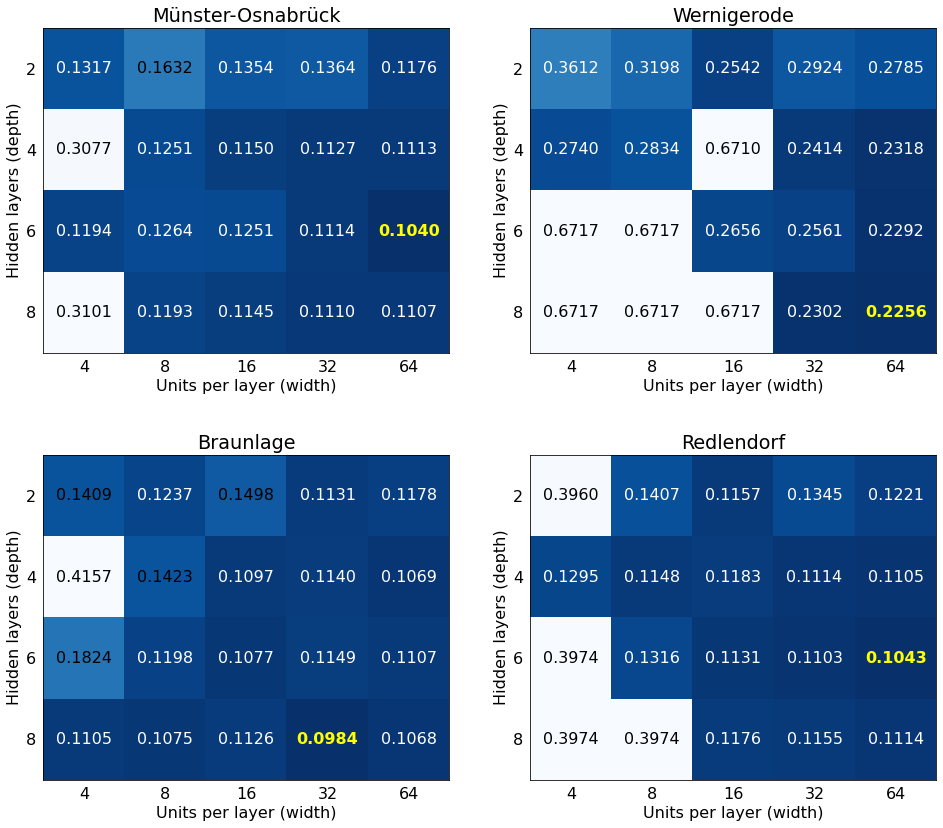

In [25]:
fig, ax = plt.subplots(2, 2,figsize=(16, 15))

depth = [2, 4, 6, 8]
width  = [4,8,16,32,64]


for i in range(2):
    for j in range(2):
        
        station = np.reshape(locations, (2,2))[i][j]
        name = np.reshape(names, (2,2))[i][j]

        arch_exploration = np.load('search_arch/' + station + '/' + station + '_searh_arch.npy')
        medians = np.median(arch_exploration, axis=2)

        ax[i][j].set_title(name)
        ax[i][j].imshow(medians, cmap='Blues_r')

        ax[i][j].yaxis.set_ticklabels([])
        ax[i][j].xaxis.set_ticklabels([])
        ax[i][j].yaxis.set_ticks_position('none')
        ax[i][j].xaxis.set_ticks_position('none')

        ax[i][j].set_yticks(np.arange(len(depth)))
        ax[i][j].set_yticklabels([str(d) for d in depth])

        ax[i][j].set_xticks(np.arange(len(width)))
        ax[i][j].set_xticklabels([str(w) for w in width])

        ax[i][j].set_ylabel('Hidden layers (depth)')
        ax[i][j].set_xlabel('Units per layer (width)')

        medians_min = np.min(medians)
        th = np.mean(medians)



        # Loop over data dimensions and create text annotations.
        for k in range(len(depth)):
            for l in range(len(width)):

                if (medians[k,l] == medians_min):
                    text = ax[i][j].text(l, k, str(medians[k, l])[0:6],ha="center", va="center", color="Yellow", fontweight=1000)

                elif (medians[k,l] > medians_min and medians[k,l] < th):
                    text = ax[i][j].text(l, k, str(medians[k, l])[0:6],ha="center", va="center", color="White")
                elif (medians[k,l] > th): 
                    text = ax[i][j].text(l, k, str(medians[k, l])[0:6],ha="center", va="center", color="Black")


plt.subplots_adjust(wspace=0.2, hspace=0.1)
fig.savefig('figures/architectureexploration.pdf')

## Results

### Station specific

In [14]:
fig_size = (15,7)
reed = '#d62728'
bluuu = '#2F4BA1'
plt.rcParams.update({'font.size': 16})
brier_range = [0,.51]
brier_ticks = np.arange(brier_range[0], brier_range[1], .05)
brier_ticks_labels = [format(x, '.2f')[1:] for x in brier_ticks]

skill_range = [0.1, 0.66]
skill_ticks = np.arange(skill_range[0], skill_range[1], .05)
skill_ticks_labels = [format(x, '.2f')[1:] for x in skill_ticks]

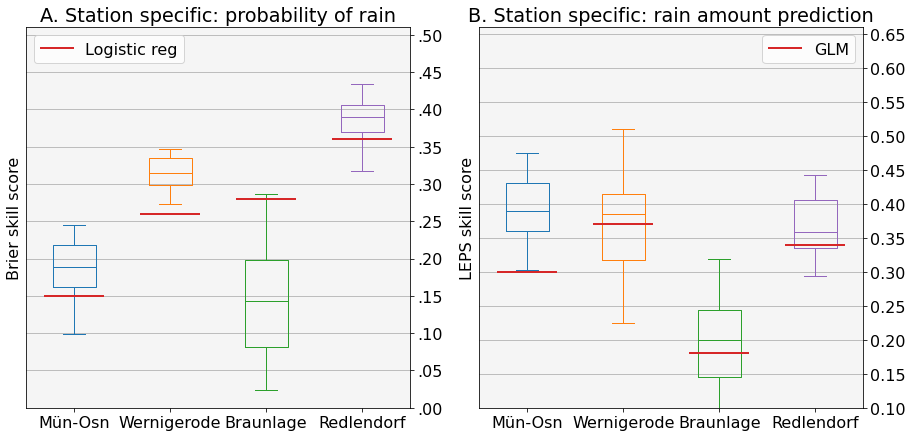

In [15]:
fig, ax = plt.subplots(1,2,figsize=fig_size)


## Specific point based classification
b = ax[0].boxplot(specific_prob_brier.T, flierprops={'marker':'*'})
ax[0].set_ylim(brier_range)

ax[0].set_title('A. Station specific: probability of rain')
set_color_boxplot(b, [0], colors[0])
set_color_boxplot(b, [1], colors[1])
set_color_boxplot(b, [2], colors[2])
set_color_boxplot(b, [3], colors[3])

ax[0].yaxis.grid(True)
ax[0].set_facecolor('whitesmoke')
ax[0].set_xticklabels(names)

# ## Makes a line for the GLM brier score
ax[0].axhline(y=np.median(log_muOsna_brier_skill), xmin=0.05, xmax=.20, linewidth=2, color=reed)
ax[0].axhline(y=np.median(log_wernig_brier_skill), xmin=0.30, xmax=.45, linewidth=2, color=reed)
ax[0].axhline(y=np.median(log_braunl_brier_skill), xmin=0.55, xmax=.70, linewidth=2, color=reed)
ax[0].axhline(y=np.median(log_redlen_brier_skill), xmin=0.80, xmax=.95, linewidth=2, color=reed)

ax[0].set_ylabel('Brier skill score')
ax[0].yaxis.tick_right()
ax[0].set_ylim(brier_range)
ax[0].set_yticks(brier_ticks)
ax[0].yaxis.set_ticklabels(brier_ticks_labels)




## General point based regression
b3 = ax[1].boxplot(specific_prob_skill.T, flierprops={'marker':'*'})

ax[1].set_ylim(skill_range)
ax[1].set_yticks(skill_ticks)

set_color_boxplot(b3, [0], colors[0])
set_color_boxplot(b3, [1], colors[1])
set_color_boxplot(b3, [2], colors[2])
set_color_boxplot(b3, [3], colors[3])

ax[1].set_title('B. Station specific: rain amount prediction')
ax[1].yaxis.grid(True)
ax[1].set_facecolor('whitesmoke')
ax[1].set_xticklabels(names)
ax[1].yaxis.tick_right()
ax[1].set_yticks(skill_ticks)
ax[1].set_ylabel('LEPS skill score')


## Makes a line for the GLM skill score
ax[1].axhline(y=glm_muOsna_skill, xmin=0.05, xmax=.20, linewidth=2, color=reed)
ax[1].axhline(y=glm_wernig_skill, xmin=0.30, xmax=.45, linewidth=2, color=reed)
ax[1].axhline(y=glm_braunl_skill, xmin=0.55, xmax=.70, linewidth=2, color=reed)
ax[1].axhline(y=glm_redlen_skill, xmin=0.80, xmax=.95, linewidth=2, color=reed)

red_line    = [matplotlib.lines.Line2D([0], [0], color=reed, linewidth=2, linestyle='-'),]
ax[0].legend(red_line, ['Logistic reg'], loc='upper left')
ax[1].legend(red_line, ['GLM'], loc='upper right')

plt.subplots_adjust(wspace=0.18)
fig.savefig('figures/StationSpecific.pdf')
fig.savefig('figures/StationSpecific.png')

/Users/adrocampos/deeprain/paper1_redo_analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


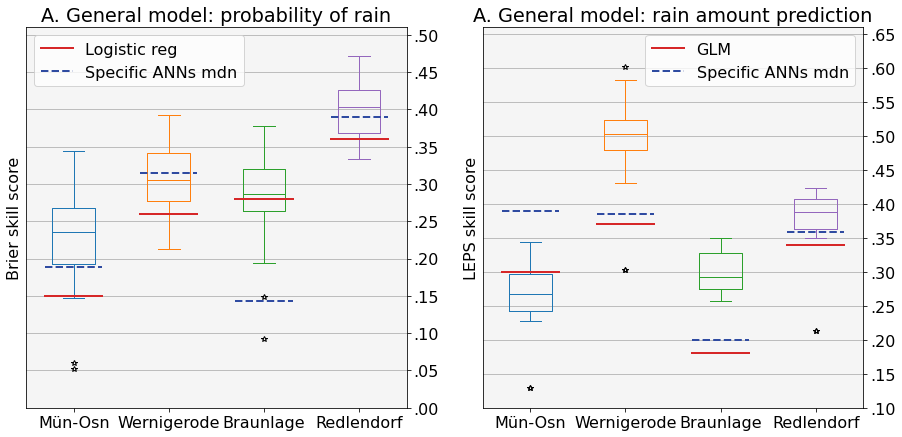

In [16]:
fig, ax = plt.subplots(1,2,figsize=fig_size)


## General point based classification
b2 = ax[0].boxplot(general_prob_brier.T, flierprops={'marker':'*'})



set_color_boxplot(b2, [0], colors[0])
set_color_boxplot(b2, [1], colors[1])
set_color_boxplot(b2, [2], colors[2])
set_color_boxplot(b2, [3], colors[3])

ax[0].set_title('A. General model: probability of rain')
ax[0].yaxis.grid(True)
ax[0].set_facecolor('whitesmoke')
ax[0].set_xticklabels(names)
ax[0].yaxis.tick_right()
ax[0].yaxis.set_ticklabels(brier_ticks_labels)
ax[0].set_ylim(brier_range)
ax[0].set_yticks(brier_ticks)
ax[0].set_ylabel('Brier skill score')


bluuu = '#2F4BA1'
alphaaa = 1
## Makes a line for the GLM brier score
ax[0].axhline(y=np.median(ann_prob_muOsna_brier), xmin=0.05, xmax=.20, linewidth=2, color=bluuu, ls='dashed', alpha=alphaaa)
ax[0].axhline(y=np.median(ann_prob_wernig_brier), xmin=0.30, xmax=.45, linewidth=2, color=bluuu, ls='dashed', alpha=alphaaa)
ax[0].axhline(y=np.median(ann_prob_braunl_brier), xmin=0.55, xmax=.70, linewidth=2, color=bluuu, ls='dashed', alpha=alphaaa)
ax[0].axhline(y=np.median(ann_prob_redlen_brier), xmin=0.80, xmax=.95, linewidth=2, color=bluuu, ls='dashed', alpha=alphaaa)


ax[0].axhline(y=np.median(log_muOsna_brier_skill), xmin=0.05, xmax=.20, linewidth=2, color=reed)
ax[0].axhline(y=np.median(log_wernig_brier_skill), xmin=0.30, xmax=.45, linewidth=2, color=reed)
ax[0].axhline(y=np.median(log_braunl_brier_skill), xmin=0.55, xmax=.70, linewidth=2, color=reed)
ax[0].axhline(y=np.median(log_redlen_brier_skill), xmin=0.80, xmax=.95, linewidth=2, color=reed)


## General point based regression
b3 = ax[1].boxplot(general_prob_skill.T, flierprops={'marker':'*'})

ax[1].set_ylim(skill_range)
ax[1].set_yticks(skill_ticks)

set_color_boxplot(b3, [0], colors[0])
set_color_boxplot(b3, [1], colors[1])
set_color_boxplot(b3, [2], colors[2])
set_color_boxplot(b3, [3], colors[3])

ax[1].set_title('A. General model: rain amount prediction')
ax[1].yaxis.grid(True)
ax[1].set_facecolor('whitesmoke')
ax[1].set_xticklabels(names)
ax[1].yaxis.tick_right()
ax[1].set_ylim(skill_range)
ax[1].yaxis.set_ticklabels(skill_ticks_labels)
ax[1].set_ylabel('LEPS skill score')

ax[1].axhline(y=glm_muOsna_skill, xmin=0.05, xmax=.20, linewidth=2, color=reed)
ax[1].axhline(y=glm_wernig_skill, xmin=0.30, xmax=.45, linewidth=2, color=reed)
ax[1].axhline(y=glm_braunl_skill, xmin=0.55, xmax=.70, linewidth=2, color=reed)
ax[1].axhline(y=glm_redlen_skill, xmin=0.80, xmax=.95, linewidth=2, color=reed)

ax[1].axhline(y=np.median(ann_prob_muOsna_skill), xmin=0.05, xmax=.20, linewidth=2, color=bluuu, ls='dashed')
ax[1].axhline(y=np.median(ann_prob_wernig_skill), xmin=0.30, xmax=.45, linewidth=2, color=bluuu, ls='dashed')
ax[1].axhline(y=np.median(ann_prob_braunl_skill), xmin=0.55, xmax=.70, linewidth=2, color=bluuu, ls='dashed')
ax[1].axhline(y=np.median(ann_prob_redlen_skill), xmin=0.80, xmax=.95, linewidth=2, color=bluuu, ls='dashed')

blue_line =  [matplotlib.lines.Line2D([0], [0], color=bluuu, linewidth=2, linestyle='dashed')]
red_line    = [matplotlib.lines.Line2D([0], [0], color=reed, linewidth=2, linestyle='-'),]
ax[0].legend([red_line[0], blue_line[0]], ['Logistic reg','Specific ANNs mdn'], loc='upper left')
ax[1].legend([red_line[0], blue_line[0]], ['GLM','Specific ANNs mdn'], loc='upper right')

plt.subplots_adjust(wspace=0.20)
fig.savefig('figures/GeneralModels.pdf')
fig.savefig('figures/GeneralModels.png')